In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, sosfilt, sosfreqz
import os
import scienceplots

In [14]:

wav_path = 'input_data/tap_actuator.wav'

if not os.path.exists(wav_path):
    raise FileNotFoundError(f"WAV file not found: {wav_path}")

sample_rate, data = wavfile.read(wav_path)

# Normalize if needed
#if data.dtype != np.float32:
#    data = data / np.max(np.abs(data))

# Handle stereo by selecting one channel
if data.ndim > 1:
    data = data[:, 0]

print(f"Loaded '{wav_path}' at {sample_rate} Hz")

Loaded 'input_data/tap_actuator.wav' at 44100 Hz


/var/folders/kd/v3035tq94wdfg4dqh988_zcr0000gp/T/ipykernel_5409/3410724016.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(wav_path)


In [15]:
def design_lowpass_filter(cutoff_hz, sample_rate):
    # 4th-order Butterworth lowpass (two biquads)
    sos = butter(N=4, Wn=cutoff_hz, btype='low', fs=sample_rate, output='sos')
    return sos

cutoff_freq = 10000  # Hz (adjustable)
sos = design_lowpass_filter(cutoff_freq, sample_rate)

In [16]:
print("Max sample value:",np.max(np.abs(data)))
data = [x / ((2.0**32) - 1.0) for x in data]
data = [x * 3.0 for x in data] #Convert to current in Amps
data = [x * 1000.0 for x in data] #Convert to current in milliAmps

filtered_data = sosfilt(sos, data)
# Normalize filtered signal
#filtered_data = filtered_data / np.max(np.abs(filtered_data))


Max sample value: 626262016


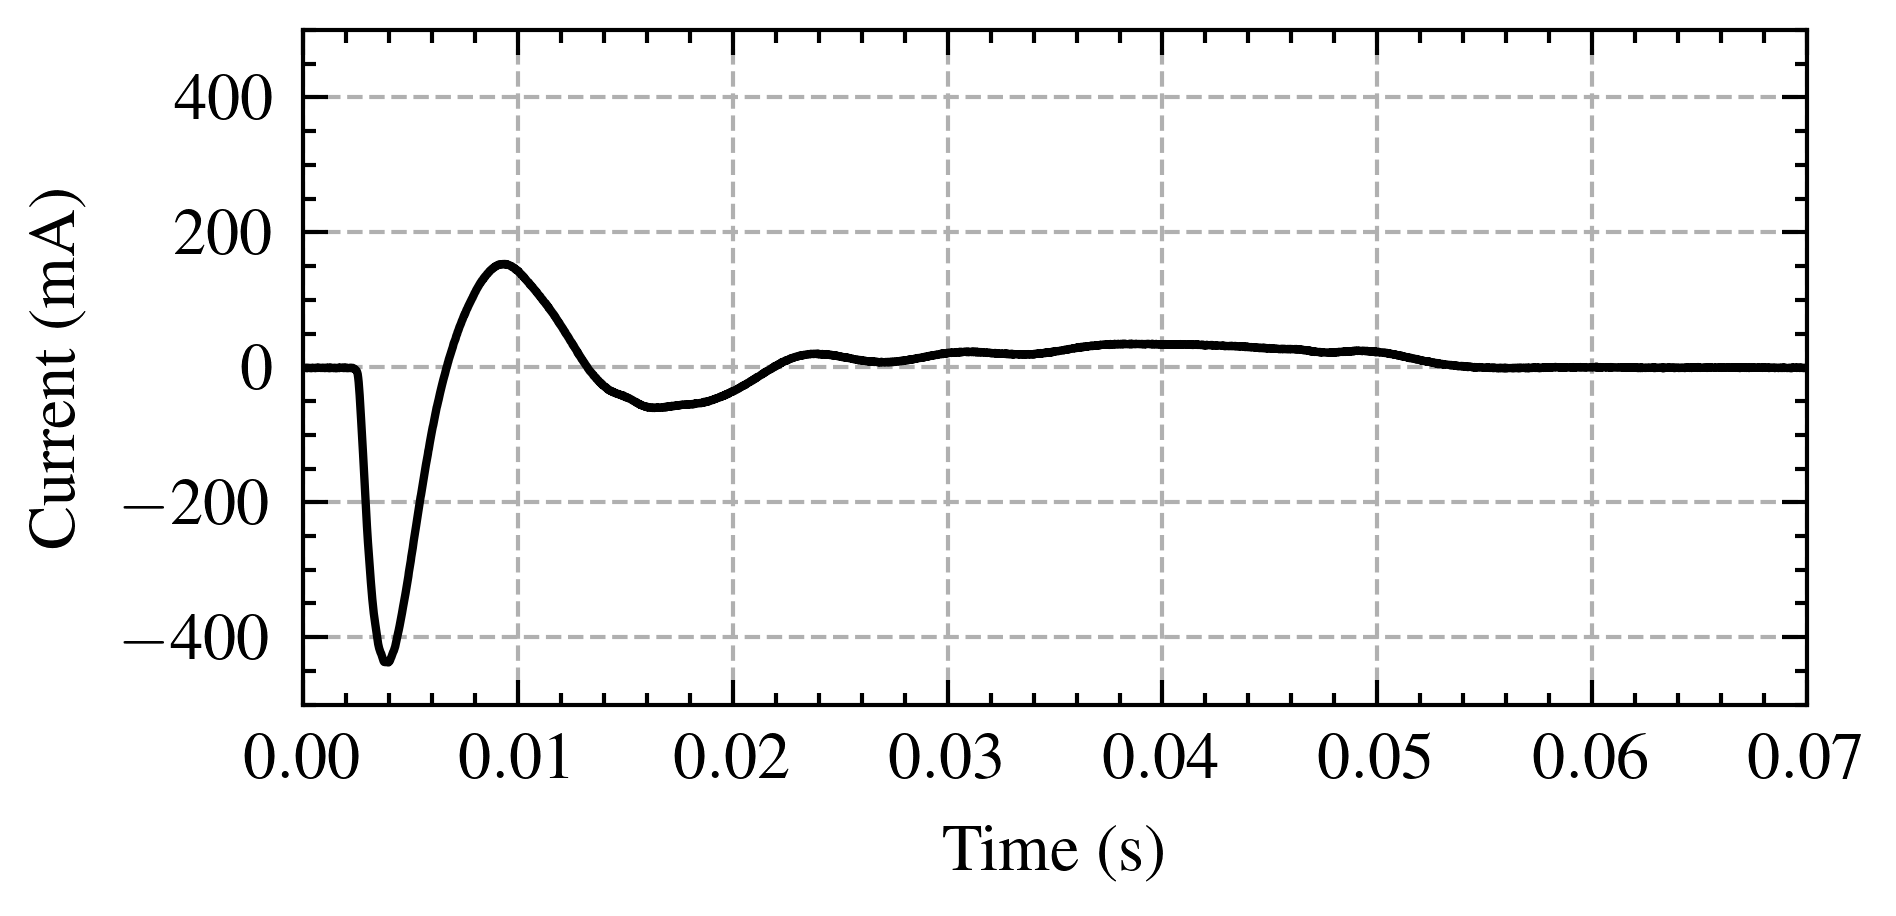

In [26]:
#set Times New Roman as the default font
import matplotlib as mpl
#mpl.rcParams['font.family'] = 'Times New Roman'

time = np.arange(len(data)) / sample_rate



# Set the time range to zoom in (in seconds)
start_time = 0.64
end_time = 0.71

# Convert to sample indices
start_idx = int(start_time * sample_rate)
end_idx = int(end_time * sample_rate)
range_idx = end_idx - start_idx

#plt.figure(figsize=(6,4))
plt.figure()
plt.plot(time[0:range_idx], data[start_idx:end_idx], label='Original', alpha=1)
#plt.plot(time[0:range_idx], filtered_data[start_idx:end_idx], label='Filtered', alpha=0.8)

plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
#plt.legend()
#plt.grid(True, color='tab:gray', linestyle='-', linewidth=0.5)



# Get current axis
ax = plt.gca()

ax.set_ylim([-500,500])
y_min, y_max = ax.get_ylim()

#ax.set_ylim([-180,180])
ax.set_xlim([0,0.07])


plt.grid(True, which='major',axis='both', linestyle='--', linewidth=0.5)

plt.style.use(['science','ieee'])

f_size = list(plt.rcParams["figure.figsize"])
f_size[1] = f_size[1] / 1.5
plt.rcParams["figure.figsize"] = tuple(f_size)

plt.tight_layout()
plt.savefig('outputs/tap_waveform.eps', format='eps')
plt.show()